In [3]:
import os
import sys
cwd = os.getcwd()
ooipy_dir = os.path.dirname(cwd) + '/ooipy'
sys.path.append(ooipy_dir)
from matplotlib import pyplot as plt
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime

from obspy import read
import pickle
import scipy
from gwpy.timeseries import TimeSeries
import seaborn as sns

from ooipy.request import hydrophone_request
from ooipy.hydrophone import basic
import gwpy

import plotly.express as px
import progressbar
from scipy import signal

import spec_tools

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Merging All Spectrograms

In [9]:
import progressbar
spec_start = 0
spec_end = 1487


bar = progressbar.ProgressBar(maxval=spec_end-spec_start, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

time = []
for k in range(spec_start,spec_end):
    file_path = f"/Volumes/John's Passport/Spectrograms/Central_Caldear
    /Central_2019/spectrogram{k:03}.pkl"
    try:
        with open(file_path, 'rb') as f:
            spec = pickle.load(f)
        spec.time
    except:

        continue
    time_UTC = spec.time

    if k == spec_start:
        freq = spec.freq
    for n in range(len(time_UTC)):
        if n == 0:
            if type(time_UTC[n]) == datetime.datetime:
                time = [time_UTC[n]]
            else:
                time = [time_UTC[n].datetime]
        else:
            if type(time_UTC[n]) == datetime.datetime:
                time.append(time_UTC[n])
            else:
                time.append(time_UTC[n].datetime)
    if k == spec_start:
        values = spec.values
        times = np.asarray(time)
    else:
        values = np.vstack((values,spec.values))
        times = np.hstack((times,np.asarray(time)))
    bar.update(k- spec_start)

[=========================================================               ]  79%

In [6]:
file_path = f"/Volumes/John's Passport/Spectrograms/Central_Caldera/Central_2019"

times, freq, values = spec_tools.merge(0, 1487, file_path)

[=========================================================               ]  79%

### Write to .mat File

In [5]:
# Convert times to string
times_str = []
for k in range(len(times)):
    times_str.append(times[k].strftime("%d-%b-%Y %H:%M:%S"))

# Write Time and Frequency Arrays to .mat file
mdic = {"freq": freq, "times_str": times_str, "values":values}
scipy.io.savemat('Spectrogram.mat',mdic)

In [8]:
print(values.shape)
print(times.shape)
print(freq.shape)

print(values)

(60577, 2049)
(60577,)
(2049,)
[[ 30.20731272  32.83895153  35.76282826 ...,   5.68377697
   11.53923466   1.60499178]
 [ 32.31352434  26.70704164  31.57159114 ...,  12.37697159
   13.55804543   4.53847917]
 [ 34.34247853  32.26809612  36.45681785 ...,   5.5645176
    9.25826654  -0.3124364 ]
 ..., 
 [ 42.09422603  37.69098317  43.73012481 ...,   6.85501129
    8.50786545  -3.84658838]
 [ 52.06860638  47.39957552  47.55271245 ...,  10.60201962
   11.06484432   8.07458816]
 [ 41.67410469  41.02724552  44.7531796  ...,  10.3953325
   13.74454266  12.30711601]]


In [4]:
# Generate alternate time variables
from datetime import timedelta

times_delta = []
times_new = np.zeros((len(times),1))
for k in range(len(times)):
    times_delta.append(times[k]-times[0])
    
    times_new[k] = times_delta[k].days*24 + times_delta[k].seconds/3600


times_new = np.squeeze(times_new)

print(np.shape(times_new))

(5961,)


In [7]:
# Create Spectrogram Object

spec_full = basic.Spectrogram(times, freq, values)

/Users/jhrag/opt/anaconda3/envs/ooi/lib/python3.7/site-packages/ooipy/tools/ooiplotlib.py:188: UserWarning: The following kwargs were not used by contour: 'xlabel_rot', 'res_reduction_time', 'fmax', 'filename', 'save', 'dpi', 'plot', 'title', 'xlabel', 'xlabel_format', 'ylabel', 'fmin', 'vdelta', 'vdelta_cbar', 'figsize', 'res_reduction_freq'
  cmap=plt.cm.jet, **kwargs)


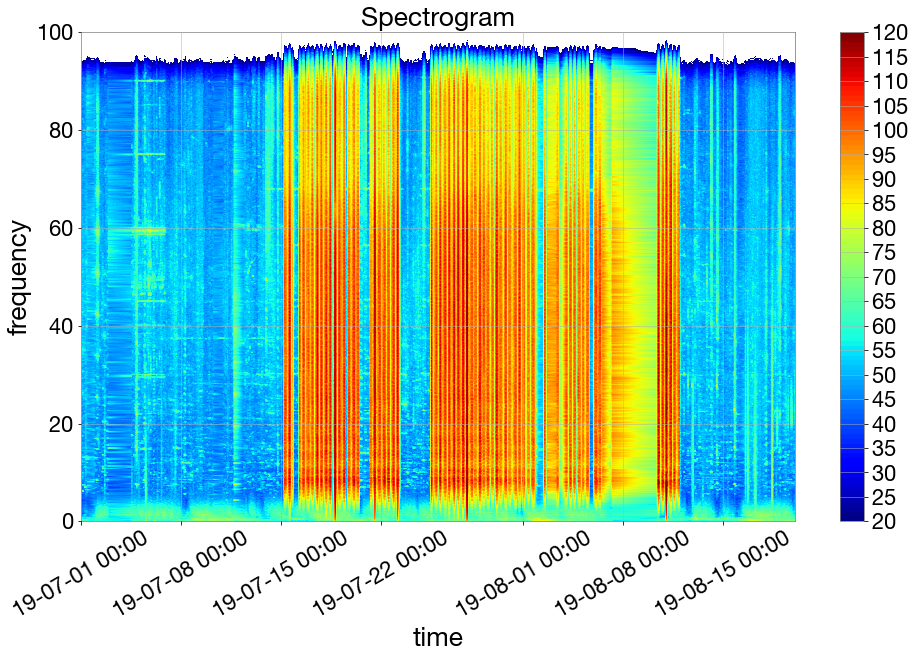

In [9]:
import ooipy
ooipy.tools.ooiplotlib.plot_spectrogram(spec_full, xlabel_rot=30,res_reduction_time=100, fmax=100, filename='Jul_Aug_Central_2019.png',save=True, dpi=300, vmin=20, vmax=120)

# Generate Month Spectrograms

In [4]:
import spec_tools

spec_tools.create_all_specs()

Merging Spectrograms for Jan, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for Feb, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for Mar, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for Apr, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for May, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for Jun, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for Jul, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for Aug, Central_Caldera, 2016...


[======================================================================= ]  99%

Merging Spectrograms for Sep, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for Oct, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for Nov, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for Dec, Central_Caldera, 2016...


[======================================================================= ]  98%

Merging Spectrograms for Jan, Central_Caldera, 2017...


[======================================================================= ]  99%

Merging Spectrograms for Feb, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for Mar, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for Apr, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for May, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for Jun, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for Jul, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for Aug, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for Sep, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for Oct, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for Nov, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for Dec, Central_Caldera, 2017...


[======================================================================= ]  98%

Merging Spectrograms for Jan, Central_Caldera, 2018...


[======================================================================= ]  98%

Merging Spectrograms for Feb, Central_Caldera, 2018...


[======================================================================= ]  98%

Merging Spectrograms for Mar, Central_Caldera, 2018...


[======================================================================= ]  98%

Merging Spectrograms for Apr, Central_Caldera, 2018...


[======================================================================= ]  98%

Merging Spectrograms for May, Central_Caldera, 2018...


[======================================================================= ]  98%

Merging Spectrograms for Jun, Central_Caldera, 2018...


[======================================================================= ]  98%

Merging Spectrograms for Jul, Central_Caldera, 2018...


[======================================================================= ]  98%

Merging Spectrograms for Aug, Central_Caldera, 2018...


[======================================================================= ]  98%

Merging Spectrograms for Sep, Central_Caldera, 2018...


[================================================================        ]  90%

Merging Spectrograms for Oct, Central_Caldera, 2018...


[                                                                        ] N/A%

UnboundLocalError: local variable 'values' referenced before assignment

Error in callback <function flush_figures at 0x7fd307c3d5f0> (for post_execute):


KeyboardInterrupt: 

## Make Yearlong Spectrogram

In [ ]:
import spec_tools
file_dir = "/Volumes/John's Passport/Spectrograms/Central_Caldera/2016"
times, freq, values = spec_tools.merge(0,8784,file_dir)

[=======================================                                 ]  54%

## Single Month

Merging Spectrograms for Dec, Eastern_Caldera, 2018...


[======================================================================  ]  97%

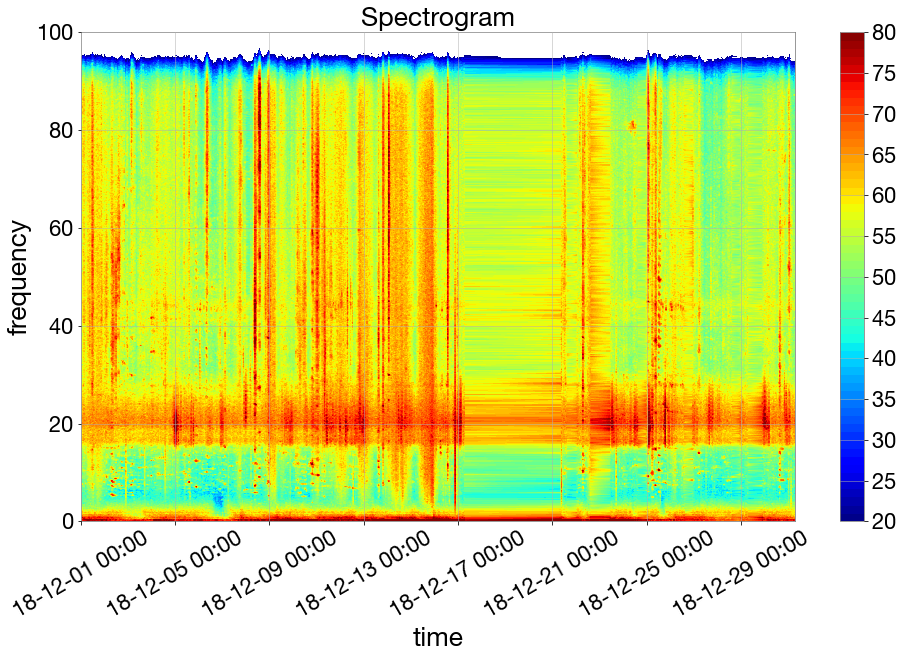

In [10]:
spec_dir = "/Volumes/John's Passport/Spectrograms/Eastern_Caldera/2018"

spec_tools.single_month(spec_dir,12)


# Generate PSD for Different Time Windows


In [64]:
#Find Index for Desired Time Window
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

time1 = datetime.datetime(2017,3,15,0,0,0)
time2 = datetime.datetime(2017,3,16,0,0,0)

idx1 = find_nearest(spec_full.time, time1)
idx2 = find_nearest(spec_full.time, time2)

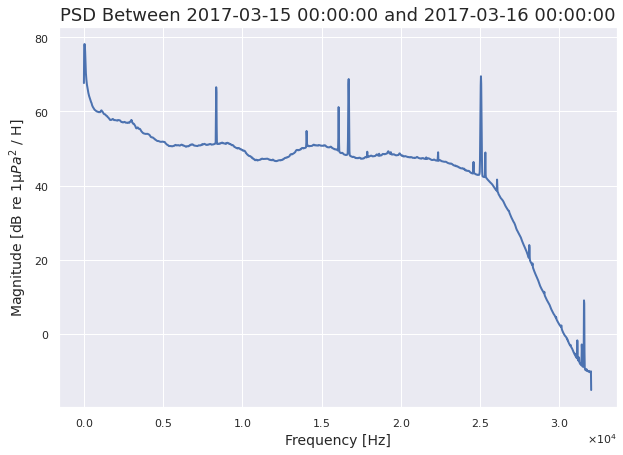

In [65]:
psd = np.mean(spec_full.values[idx1:idx2,:],axis=0)
sns.set()

fig = plt.figure(figsize=(10,7))
plt.plot(spec_full.freq, psd, linewidth=2)
plt.title(f'PSD Between {time1} and {time2}', fontsize=18)
plt.ylabel('Magnitude [dB re 1µ$Pa^2$ / H]', fontsize=14)
plt.xlabel('Frequency [Hz]', fontsize=14)
plt.savefig('psd_for_3-15to3-16.png')

# Learning What Happens with Partial Data

In [ ]:
file_path = f'LJ01C-Spectrogram/spectrogram058.pkl'

with open(file_path, 'rb') as f:
    spec = pickle.load(f)
    
if(spec.values.shape[0]==60):
    a = numpy.empty((60,2049))
    a[:] = numpy.nan
    
    values = np.vstack((values,a))
    time
    

In [ ]:
file_path = f'LJ01C-Spectrogram/spectrogram059.pkl'

with open(file_path, 'rb') as f:
    spec = pickle.load(f)
    
print(spec)

## High Resolution Spectograms

In [4]:
# Get Audio
start_time = datetime.datetime(2017,3,23,0,0,0)
end_time = datetime.datetime(2017,3,23,9,0,0)
node = 'Central_Caldera'
data = hydrophone_request.get_acoustic_data_LF(start_time, end_time, node, verbose=True)

In [14]:
data.stats

         network: OO
         station: AXCC1
        location: Central_Caldera
         channel: HDH
       starttime: 2017-03-23T00:00:00.000000Z
         endtime: 2017-03-23T01:17:34.845355Z
   sampling_rate: 199.9999847412109
           delta: 0.005000000381469756
            npts: 930970
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 2732, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 10817024})

In [9]:
spec = data.compute_spectrogram(L=256)

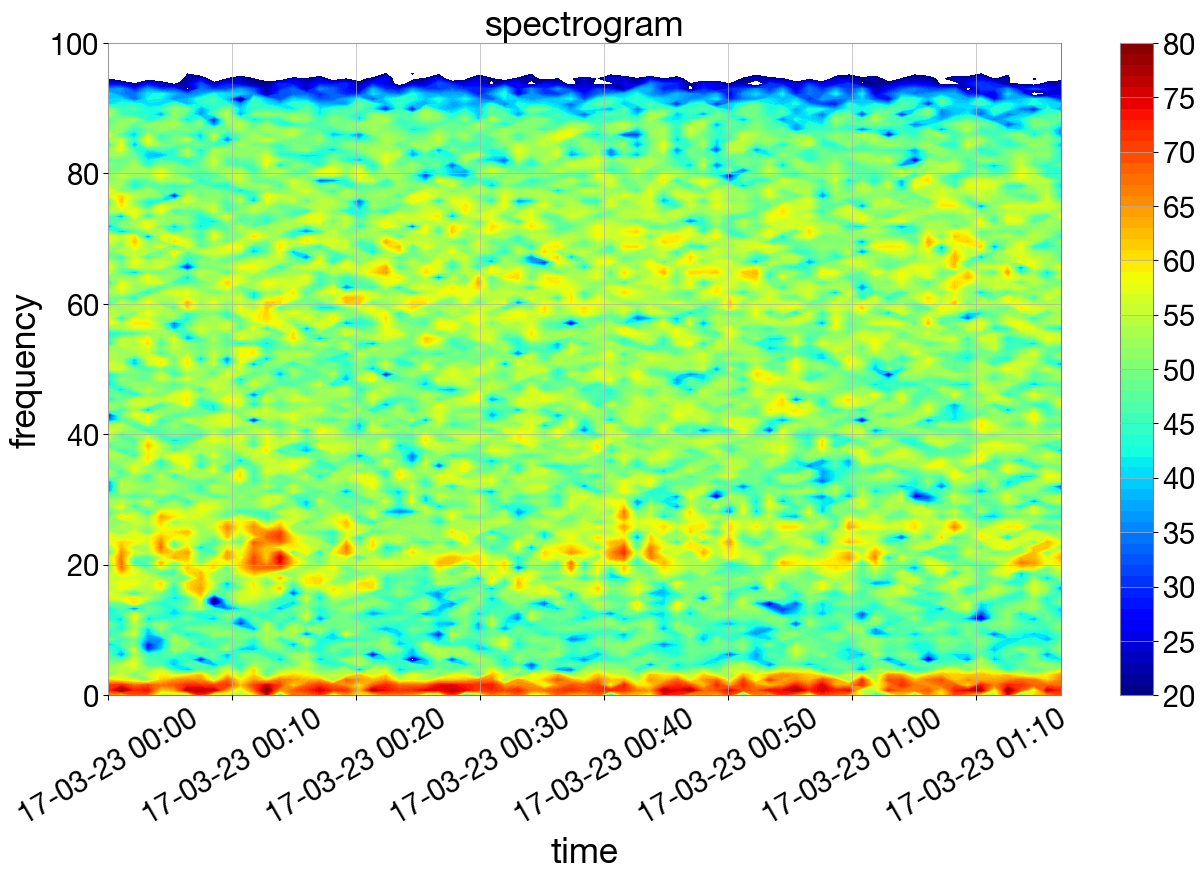

In [12]:
spec.visualize(xlabel_rot=30,res_reduction_time=50, fmax=100, filename='full_500hrs_Eastern_Caldera.png',save_spec=False, time_limits=None)

## High Resolution Spectrogram Take 2

In [19]:
import progressbar
bar = progressbar.ProgressBar(maxval=500, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

time = []
for k in range(300,350):
    file_path = f'Central_Caldera/spectrogram{k:03}.pkl'
    try:
        with open(file_path, 'rb') as f:
            spec = pickle.load(f)
    except:
        #values_NaN = np.empty((60,2049))
        #values_NaN[:] = np.nan
        #time_NaN = np.empty(60)
        #time_NaN[:] = np.nan
        #values = np.vstack((values,values_NaN))
        #times = np.hstack((times,time_NaN))
        continue
    if spec == None:
        #values_NaN = np.empty((60,2049))
        #values_NaN[:] = np.nan
        #time_NaN = np.empty(60)
        #time_NaN[:] = np.nan
        #values = np.vstack((values,values_NaN))
        #times = np.hstack((times,time_NaN))
        continue
    
    time_UTC = spec.time
    if k == 0:
        freq = spec.freq
    for n in range(len(time_UTC)):
        if n == 0:
            time = [time_UTC[n].datetime]
        else:
            time.append(time_UTC[n].datetime)
    if k == 0:
        values = spec.values
        times = np.asarray(time)
    else:
        values = np.vstack((values,spec.values))
        times = np.hstack((times,np.asarray(time)))
    bar.update(k)

array([[ 56.05798202,  52.08164035,  51.41647487, ...,
         13.34849796,  10.94777528,   2.4850945 ],
       [ 62.57858496,  59.14174477,  50.71498278, ...,
          6.31988475,  11.81859133,   6.74168383],
       [ 47.34670067,  46.9082794 ,  51.35060834, ...,
          6.81856535,   7.61090715,   6.70290996],
       ..., 
       [ 51.93172803,  47.48324053,  56.16928405, ...,
          8.5159125 ,   8.23861247,   4.93267315],
       [ 49.83328222,  46.105418  ,  47.77667406, ...,
         11.50358017,   7.70447567,   8.15303727],
       [ 55.23547259,  51.79187836,  51.6511275 , ...,
         11.68184563,   8.37725211,   2.6749451 ]])

## Looking at Energy vs. Time

In [4]:
import progressbar
spec_start = 0
spec_end = 600


bar = progressbar.ProgressBar(maxval=spec_end-spec_start, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

time = []
for k in range(spec_start,spec_end):
    file_path = f'Central_Caldera_July/spectrogram{k:03}.pkl'
    try:
        with open(file_path, 'rb') as f:
            spec = pickle.load(f)
    except:

        continue
    
    time_UTC = spec.time

    if k == spec_start:
        freq = spec.freq
    for n in range(len(time_UTC)):
        if n == 0:
            if type(time_UTC[n]) == datetime.datetime:
                time = [time_UTC[n]]
            else:
                time = [time_UTC[n].datetime]
        else:
            if type(time_UTC[n]) == datetime.datetime:
                time.append(time_UTC[n])
            else:
                time.append(time_UTC[n].datetime)
    if k == spec_start:
        values = spec.values
        times = np.asarray(time)
    else:
        values = np.vstack((values,spec.values))
        times = np.hstack((times,np.asarray(time)))
    bar.update(k- spec_start)

[======================================================================= ]  98%

In [12]:
energy = np.sum(values,axis=1)
times.shape

(35621,)

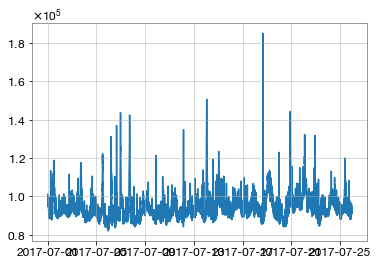

In [13]:
plt.plot(times, energy)